# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("sinasc_RO_2019.csv")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
# Definindo os limites para categorizar a variável APGAR5
limites = [-1, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criando uma nova coluna 'APGAR5_CATEGORIA' com as categorias definidas
df['APGAR5_CATEGORIA'] = pd.cut(df['APGAR5'], bins=limites, labels=categorias, include_lowest=True)

# Exibindo as 5 primeiras linhas do DataFrame com a nova coluna
print(df[['APGAR5', 'APGAR5_CATEGORIA']].head())

   APGAR5 APGAR5_CATEGORIA
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

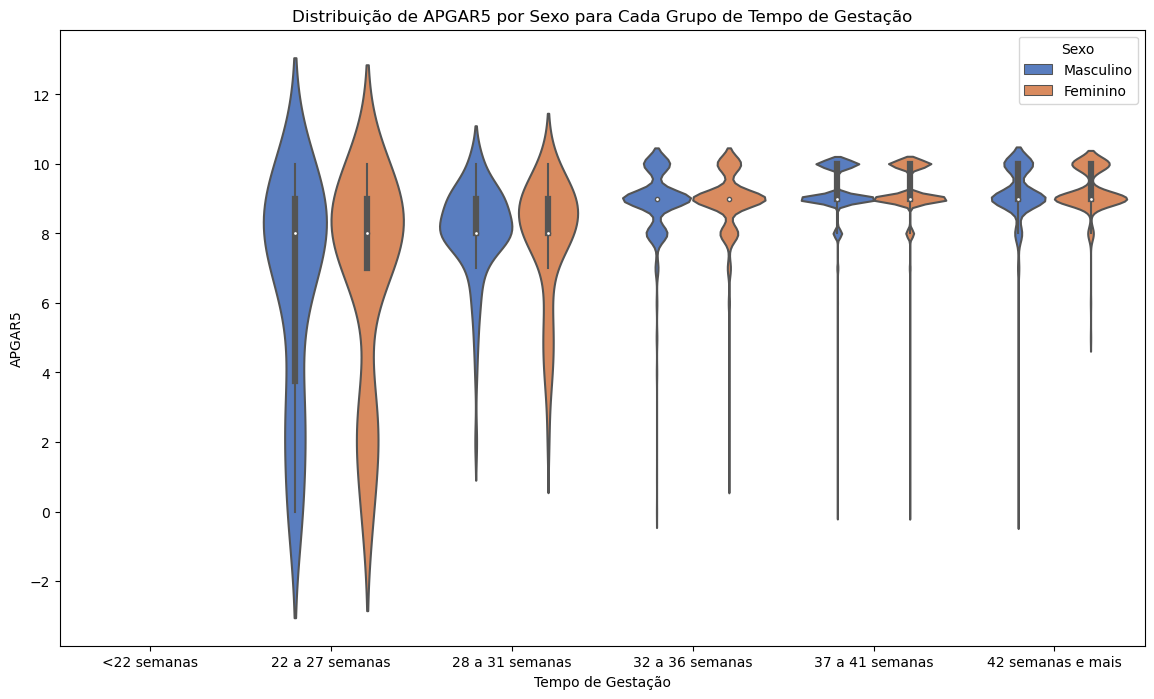

In [4]:
# Definindo a ordem das categorias para melhor visualização
ordem_gestacao = ['<22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

# Criando um gráfico de violino
plt.figure(figsize=(14, 8))
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, order=ordem_gestacao, palette='muted')
plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo', loc='upper right')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
# Criando a tabela cruzada entre APGAR5 e GESTACAO
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'], margins=True, margins_name='Total')

# Exibindo a tabela cruzada
print(tabela_cruzada)

APGAR5               0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0    9.0  \
GESTACAO                                                                   
22 a 27 semanas        7    0    8    6    1    0    2   10    24     19   
28 a 31 semanas        0    0    2    1    5    7    7   11    61     55   
32 a 36 semanas        2    2    2    2    8   11   17   56   362   1307   
37 a 41 semanas        5   20    3    5    7   21   45  151  1417  13565   
42 semanas e mais      1    0    0    0    0    1    1    5    44    423   
Menos de 22 semanas    1    0    1    0    0    0    0    1     0      3   
Total                 16   22   16   14   21   40   72  234  1908  15372   

APGAR5               10.0  Total  
GESTACAO                          
22 a 27 semanas         8     85  
28 a 31 semanas        13    162  
32 a 36 semanas       465   2234  
37 a 41 semanas      7284  22523  
42 semanas e mais     223    698  
Menos de 22 semanas     1      7  
Total                7994  25709  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
# Calculando os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada['Total'], axis=0) * 100

# Exibindo os percentuais de linha
print(percentuais_linha)

APGAR5                     0.0       1.0        2.0       3.0       4.0  \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   
Total                 0.062235  0.085573   0.062235  0.054456  0.081683   

APGAR5                    5.0       6.0        7.0        8.0        9.0  \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas     

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

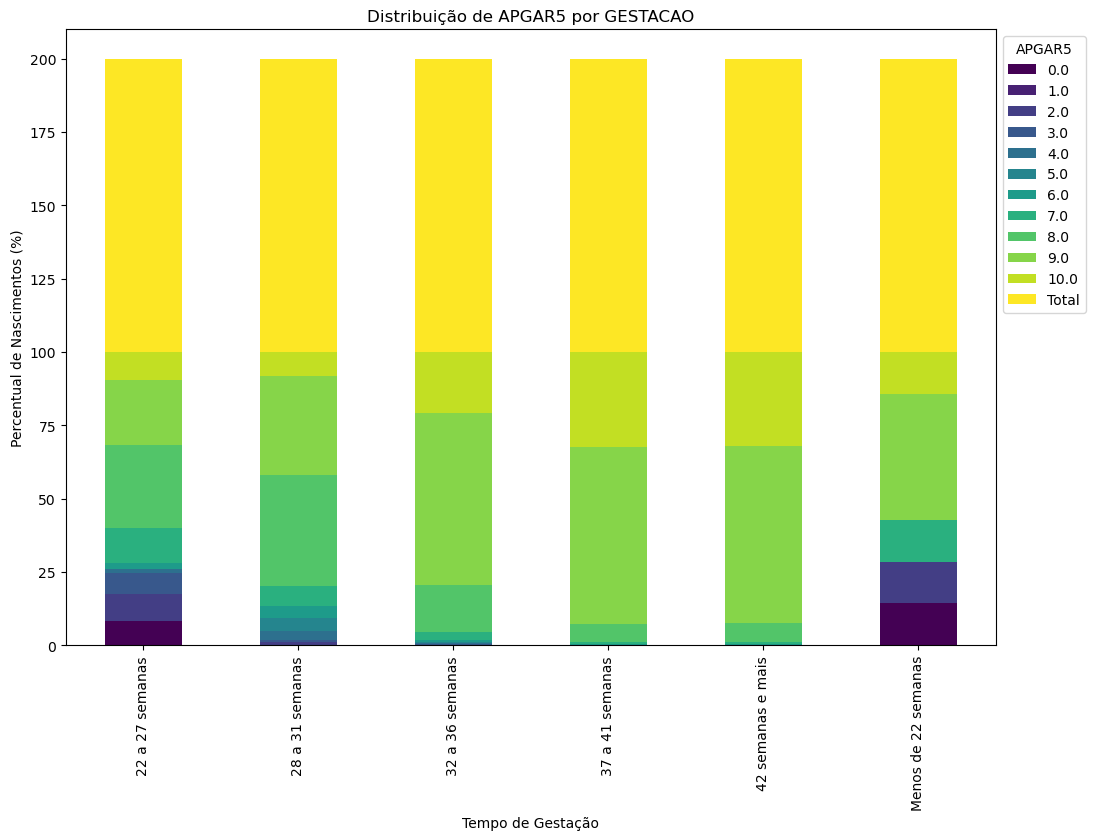

In [7]:
# Criando um gráfico de barras empilhadas
ax = percentuais_linha.drop('Total').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribuição de APGAR5 por GESTACAO')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual de Nascimentos (%)')
plt.legend(title='APGAR5', bbox_to_anchor=(1, 1))
plt.show()

In [8]:
# É possível observar as barras que representam gestações com menos de 37 semanas,  analisando como os percentuais de APGAR5 se distribuem nessas categoria, observamos uma tendência consistente com a afirmação médica de que gestações com menos de 37 semanas (parto prematuro) estão associadas a uma distribuição mais diversificada das pontuações APGAR5. Os resultados indicam que a prematuridade pode influenciar a variabilidade nas condições de saúde dos recém-nascidos, conforme refletido nas pontuações APGAR5.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

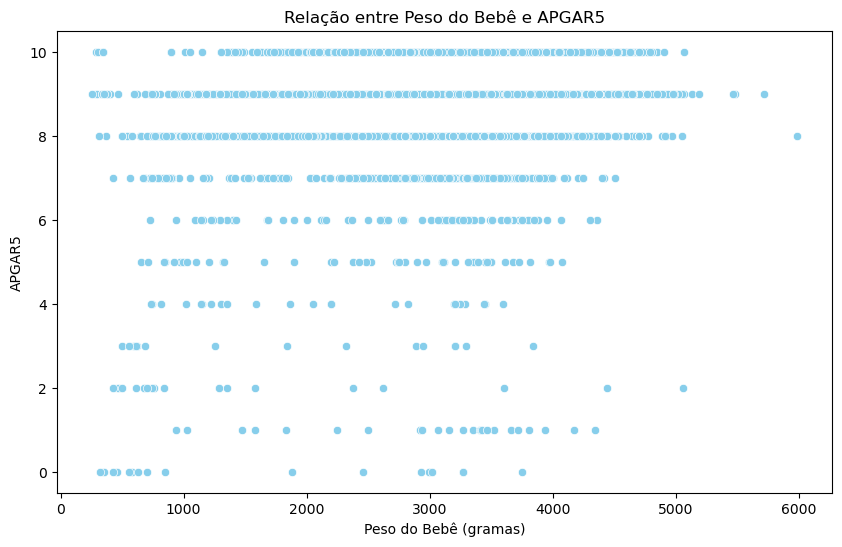

In [9]:
# Criando um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PESO', y='APGAR5', data=df, color='skyblue')
plt.title('Relação entre Peso do Bebê e APGAR5')
plt.xlabel('Peso do Bebê (gramas)')
plt.ylabel('APGAR5')
plt.show()

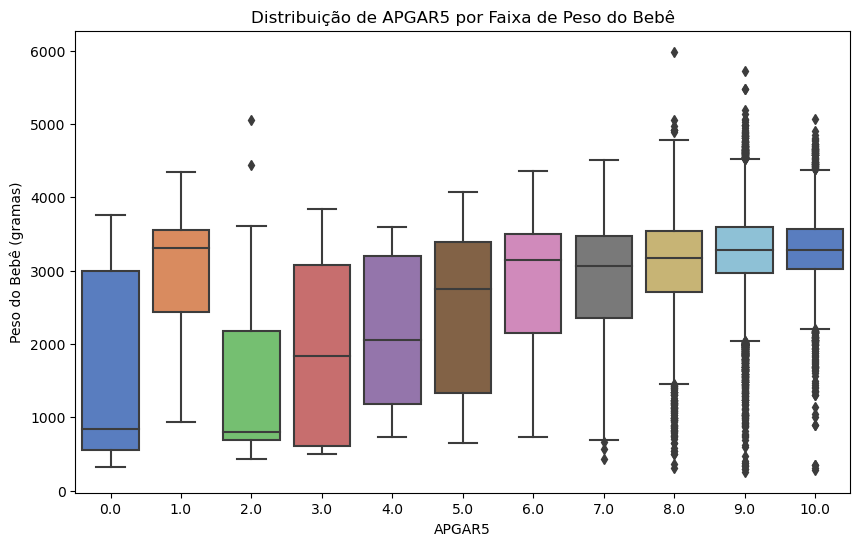

In [10]:
# Criando um gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='APGAR5', y='PESO', data=df, palette='muted')
plt.title('Distribuição de APGAR5 por Faixa de Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')
plt.show()

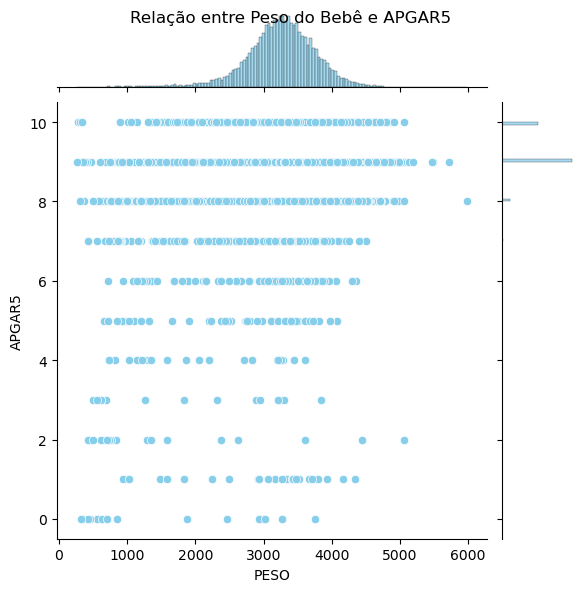

In [11]:
# Criando um gráfico conjunto
sns.jointplot(x='PESO', y='APGAR5', data=df, kind='scatter', color='skyblue')
plt.suptitle('Relação entre Peso do Bebê e APGAR5')
plt.show()

In [13]:
# os gráficos sugerem que o peso do bebê pode influenciar a pontuação APGAR5, com uma tendência de pontuações mais altas em bebês com pesos mais elevados. 